In [1]:
import numpy as np
import pandas as pd
from interactions_data import create_index, reset_ids
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
path = 'goodbooks-10k/'
url = 'https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/ratings.csv'

In [3]:
df = pd.read_csv(url)

In [4]:
df.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [5]:
df.shape

(5976479, 3)

In [6]:
books = pd.read_csv('https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/books.csv')[['book_id','goodreads_book_id','original_title','language_code']]
tags = pd.read_csv('https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/tags.csv')
book_tags = pd.read_csv('https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/book_tags.csv')

In [7]:
books.head()

,book_id,goodreads_book_id,original_title,language_code
0,1,2767052,The Hunger Games,eng
1,2,3,Harry Potter and the Philosopher's Stone,eng
2,3,41865,Twilight,en-US
3,4,2657,To Kill a Mockingbird,eng
4,5,4671,The Great Gatsby,eng


In [8]:
tags.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [9]:
tags.shape

(34252, 2)

In [10]:
book_tags.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [11]:
book_tags.shape

(999912, 3)

In [12]:
# check that all book_ids in books are in df
np.all(books['book_id'].isin(df.book_id.unique()))

True

In [13]:
# check that all book_ids in book tags are in books
np.all(book_tags['goodreads_book_id'].isin(books.goodreads_book_id.unique()))

True

In [14]:
book_tags = pd.merge(pd.merge(books, book_tags), tags)

In [15]:
book_tags.head()

,book_id,goodreads_book_id,original_title,language_code,tag_id,count,tag_name
0,1,2767052,The Hunger Games,eng,11557,50755,favorites
1,2,3,Harry Potter and the Philosopher's Stone,eng,11557,48220,favorites
2,3,41865,Twilight,en-US,11557,11782,favorites
3,4,2657,To Kill a Mockingbird,eng,11557,30903,favorites
4,5,4671,The Great Gatsby,eng,11557,20851,favorites


In [16]:
top_tags = book_tags.tag_id.value_counts()[:50].index.values

In [17]:
book_tags[book_tags['tag_id'].isin(top_tags)]['tag_name'].unique()

array(['favorites', 'currently-reading', 'young-adult', 'fiction',
       'to-read', 'fantasy', 'books-i-own', 'series', 'owned',
       'favourites', 'romance', 'adventure', 'book-club', 'kindle',
       'read-in-2012', 'my-books', 're-read', 'books', 'i-own', 'novels',
       'ebook', 'audiobook', 'audiobooks', 'ebooks', 'default', 'library',
       'my-library', 'audio', 'own-it', 'read-in-2013', 'borrowed',
       'english', 'to-buy', 'novel', 'read-in-2014', 'contemporary',
       'e-book', 'owned-books', 'read-in-2016', 'read-in-2015', 'mystery',
       'abandoned', 'have', 'adult', 'adult-fiction', 'wish-list',
       'e-books', 'audible', 'audio-books', 'audio-book'], dtype=object)

In [18]:
genres = ['adult','adult-fiction','adventure','book-club','contemporary','fantasy','fiction','mystery','romance','young-adult']

In [19]:
book_genres = book_tags[book_tags['tag_name'].isin(genres)]

In [20]:
book_genres.head()

,book_id,goodreads_book_id,original_title,language_code,tag_id,count,tag_name
19657,1,2767052,The Hunger Games,eng,33114,25968,young-adult
19658,2,3,Harry Potter and the Philosopher's Stone,eng,33114,14984,young-adult
19659,3,41865,Twilight,en-US,33114,16446,young-adult
19660,4,2657,To Kill a Mockingbird,eng,33114,2436,young-adult
19661,5,4671,The Great Gatsby,eng,33114,397,young-adult


In [21]:
book_genres = pd.concat((book_genres, pd.get_dummies(book_genres.tag_name)), sort=False, axis=1).groupby('book_id').agg('sum').reset_index()

In [22]:
# drop the ID and count columns
book_genres.drop(['goodreads_book_id','tag_id','count'], axis=1, inplace=True)
book_genres.head()

,book_id,adult,adult-fiction,adventure,book-club,contemporary,fantasy,fiction,mystery,romance,young-adult
0,1,0,0,1,1,1,1,1,0,1,1
1,2,0,0,1,0,1,1,1,1,0,1
2,3,0,0,0,1,1,1,1,0,0,1
3,4,1,1,0,1,1,0,1,1,0,1
4,5,1,1,0,1,0,0,1,0,1,1


In [23]:
book_genres.shape

(9695, 11)

In [24]:
books = pd.merge(books, book_genres, on='book_id').drop('goodreads_book_id', axis=1)

In [25]:
books.head()

,book_id,original_title,language_code,adult,adult-fiction,adventure,book-club,contemporary,fantasy,fiction,mystery,romance,young-adult
0,1,The Hunger Games,eng,0,0,1,1,1,1,1,0,1,1
1,2,Harry Potter and the Philosopher's Stone,eng,0,0,1,0,1,1,1,1,0,1
2,3,Twilight,en-US,0,0,0,1,1,1,1,0,0,1
3,4,To Kill a Mockingbird,eng,1,1,0,1,1,0,1,1,0,1
4,5,The Great Gatsby,eng,1,1,0,1,0,0,1,0,1,1


In [26]:
books.book_id.nunique()

9695

In [27]:
n_users = df.user_id.nunique()
n_items = df.book_id.nunique()
max_score = df.rating.max()
min_score = df.rating.min()

In [28]:
print(n_users, df.user_id.max())
print(n_items, df.book_id.max())
print(min_score, max_score)

53424 53424
10000 10000
1 5


### Encode IDs
These ID's start at 1, but need to begin at 0

In [29]:
df['user_id'] = df['user_id'].apply(lambda user_id: user_id-1)
df['book_id'] = df['book_id'].apply(lambda book_id: book_id-1)
books['book_id'] = books['book_id'].apply(lambda book_id: book_id-1)

In [30]:
df.head()

,user_id,book_id,rating
0,0,257,5
1,1,4080,4
2,1,259,5
3,1,9295,5
4,1,2317,3


In [31]:
books.head()

,book_id,original_title,language_code,adult,adult-fiction,adventure,book-club,contemporary,fantasy,fiction,mystery,romance,young-adult
0,0,The Hunger Games,eng,0,0,1,1,1,1,1,0,1,1
1,1,Harry Potter and the Philosopher's Stone,eng,0,0,1,0,1,1,1,1,0,1
2,2,Twilight,en-US,0,0,0,1,1,1,1,0,0,1
3,3,To Kill a Mockingbird,eng,1,1,0,1,1,0,1,1,0,1
4,4,The Great Gatsby,eng,1,1,0,1,0,0,1,0,1,1


### EDA

In [33]:
sns.set(style='whitegrid', palette='muted',
        rc={'figure.figsize': (16,9),
            'font.family': 'serif'})

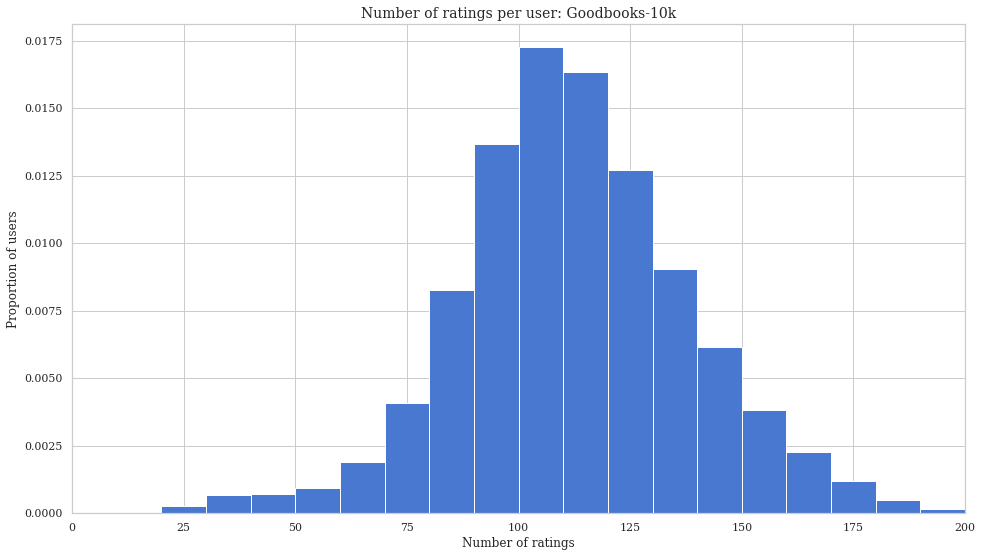

Min ratings by single user: 19
Max ratings by single user: 200
Avg number of ratings per user: 112


In [34]:
user_counts = df['user_id'].value_counts()

plt.hist(user_counts, bins=np.arange(0,201,10), density=True)
plt.title('Number of ratings per user: Goodbooks-10k', fontsize=14)
plt.xlabel('Number of ratings', fontsize=12)
plt.ylabel('Proportion of users', fontsize=12)
plt.xlim(0, 200)
# plt.xticks(np.arange(0,1251,250))
plt.savefig('../figures/goodbooks_user-ratings.pdf', bbox_inches='tight')
plt.show()

# user with fewest ratings
print('Min ratings by single user:',
      user_counts.min())

# user with most ratings
print('Max ratings by single user:',
      user_counts.max())

# average number of ratings per user
print('Avg number of ratings per user:',
      round(user_counts.mean()))

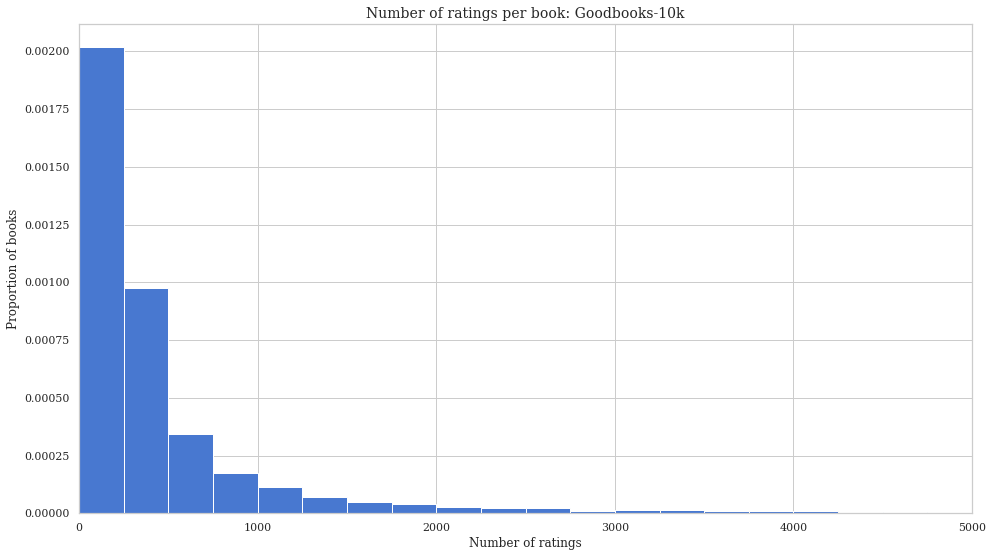

Min ratings of single book: 8
Max ratings of single book: 22806
Avg number of ratings per book: 598


In [45]:
book_counts = df['book_id'].value_counts()

plt.hist(book_counts, bins=np.arange(0,20001,250), density=True)
plt.title('Number of ratings per book: Goodbooks-10k', fontsize=14)
plt.xlabel('Number of ratings', fontsize=12)
plt.ylabel('Proportion of books', fontsize=12)
plt.xlim(0, 5000)
# plt.xticks(np.arange(0,4001,500))
plt.savefig('../figures/goodbooks-ratings.pdf', bbox_inches='tight')
plt.show()

# book with fewest ratings
print('Min ratings of single book:',
      book_counts.min())

# book with most ratings
print('Max ratings of single book:',
      book_counts.max())

# average number of ratings per book
print('Avg number of ratings per book:',
      round(book_counts.mean()))

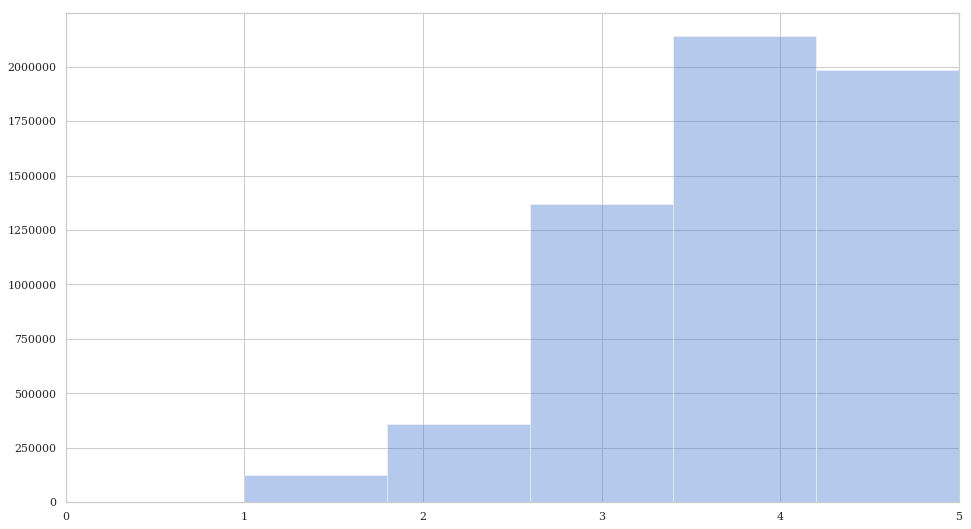

Avg rating: 3.92


In [46]:
sns.distplot(df['rating'].values, kde=False, bins=5)
plt.xlim(0,5)
plt.show()


print('Avg rating:', round(df['rating'].mean(),2))

In [47]:
df.to_csv(path+'ratings.csv', index=False)

In [49]:
new_index = pd.Index(np.arange(0,10000,1), name="book_id")
books.set_index("book_id").reindex(new_index).reset_index().to_csv(path+'books.tsv', sep='\t')